In [1]:
#import packages for data analysis 
import pandas as pd
import json
import os 

In [2]:
#import the data
with open('world_bank_projects.json') as file:
    WB = json.load(file)

In [3]:
#transform the data to a dataframe
countries = pd.DataFrame(WB, columns=['countryname'])

In [4]:
#count the entries
cc = countries.countryname.value_counts()

In [5]:
#Find the 10 countries with the most projects
t10_cc = cc.head(10)
print(t10_cc)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
Kingdom of Morocco                 12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


In [6]:
#rename index 
t10_ni =[]
for c in t10_cc.index:
    t10_ni.append(c.split()[-1])
    
t10_cc.index = t10_ni

In [7]:
#import matplotlib and numpy for plotting
import matplotlib.pyplot as plt
import numpy as np 

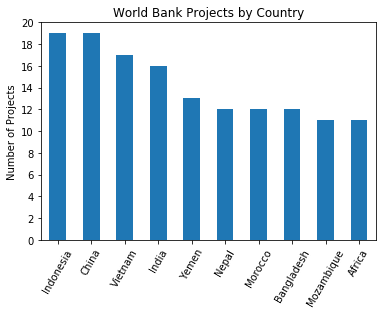

In [8]:
#create a barplot of the data
t10_cc.plot(kind='bar')
plt.xticks(rotation=60) 
plt.ylabel('Number of Projects')
plt.ylim(0,20)
plt.yticks(np.arange(0, 22, step=2))
plt.title('World Bank Projects by Country')
plt.show()

In [9]:
## 2. Find the 10 major project themes
countries['themes'] = pd.DataFrame(WB, columns=['mjtheme_namecode'])

In [10]:
#count the themes
tc = countries.themes.value_counts()

In [11]:
#find the top 10
t10_tc = tc.head(10)
print(t10_tc)

[{'code': '11', 'name': 'Environment and natural resources management'}, {'code': '11', 'name': 'Environment and natural resources management'}]                                                                                12
[{'code': '8', 'name': 'Human development'}, {'code': '11', 'name': ''}]                                                                                                                                                        11
[{'code': '8', 'name': 'Human development'}, {'code': '8', 'name': 'Human development'}]                                                                                                                                         8
[{'code': '4', 'name': 'Financial and private sector development'}, {'code': '4', 'name': 'Financial and private sector development'}]                                                                                           6
[{'code': '2', 'name': 'Public sector governance'}, {'code': '2', 'name': 'Public sector gov

In [12]:
# count individual themes
#create list of individual themes
pt = []
for l in countries['themes']:
    for d in l:
        pt.append(d)

In [13]:
#find the top 10
pt = pd.Series(pt)
pt = pt.value_counts()
pt_t10 = pt.head(10)

In [14]:
#rename index for top themes
ptt10_ni =[]
for c in pt_t10.index:
    ptt10_ni.append('Code ' + str(c['code']))
       
pt_t10.index = ptt10_ni

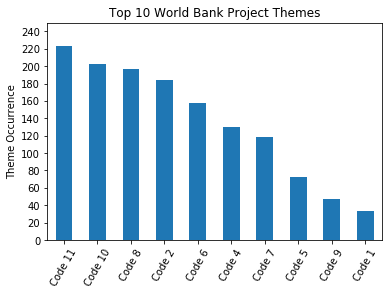

In [15]:
#plotting the top 10
pt_t10.plot(kind='bar')
plt.xticks(rotation=60) 
plt.ylabel('Theme Occurrence')
plt.ylim(0,250)
plt.yticks(np.arange(0, 250, step=20))
plt.title('Top 10 World Bank Project Themes')
plt.show()

In [16]:
##3. Fill in the missing names
#assign the column of interest to a series
tbf1 = countries['themes']

In [17]:
#an elegant coding solution
#creates a list of all themes
e = []
for l in tbf1:
    for d in l:
        e.append(d)

In [18]:
#eliminates duplicate themes
e = [i for n, i in enumerate(e) if i not in e[n + 1:]]

In [19]:
#eliminates the theme if the name is null
r =[]
for i in e: 
    if i['name'] == '': 
        r.append(i)

for i in r:
    if i in e:
        e.remove(i)

In [20]:
#sorts the resulting list by code #
e = sorted(e, key = lambda i: (int(i['code'])))

In [21]:
#counts the themes
ptu = []
for l in tbf1:
    for d in l:
        if d not in e:
            d = e[int(d['code'])-1]
        assert d['name'] != ''
        ptu.append(d)

In [22]:
#count the updated themes
tcu = pd.Series(ptu).value_counts()

In [23]:
#find the top 10
t10_tcu = tcu.head(10)
print(t10_tcu)

{'code': '11', 'name': 'Environment and natural resources management'}    250
{'code': '10', 'name': 'Rural development'}                               216
{'code': '8', 'name': 'Human development'}                                210
{'code': '2', 'name': 'Public sector governance'}                         199
{'code': '6', 'name': 'Social protection and risk management'}            168
{'code': '4', 'name': 'Financial and private sector development'}         146
{'code': '7', 'name': 'Social dev/gender/inclusion'}                      130
{'code': '5', 'name': 'Trade and integration'}                             77
{'code': '9', 'name': 'Urban development'}                                 50
{'code': '1', 'name': 'Economic management'}                               38
dtype: int64


In [24]:
#plot the top 10
#rename index for top themes
ptt10u_ni =[]
for c in t10_tcu.index:
    ptt10u_ni.append('Code ' + str(c['code']))
       
t10_tcu.index = ptt10u_ni

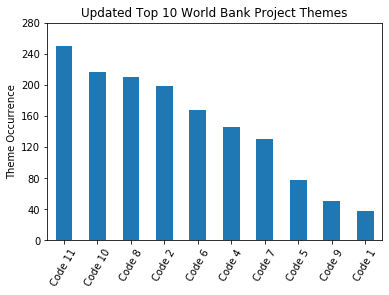

In [25]:
#plotting the top 10
t10_tcu.plot(kind='bar')
plt.xticks(rotation=60) 
plt.ylabel('Theme Occurrence')
plt.ylim(0,250)
plt.yticks(np.arange(0, 300, step=40))
plt.title('Updated Top 10 World Bank Project Themes')
plt.show()

In [26]:
#a brute force coding solution
ptu = []
for l in tbf1:
    for d in l:
        if d['code'] == '1':
            d['name'] = 'Economic management'
        elif d['code'] == '2':
            d['name'] = 'Public sector governance'
        elif d['code'] == '3':
            d['name'] = 'Rule of law'
        elif d['code'] == '4':
            d['name'] = 'Financial and private sector development'
        elif d['code'] == '5':
            d['name'] = 'Trade and integration'
        elif d['code'] == '6':
            d['name'] = 'Social protection and risk management'
        elif d['code'] == '7':
            d['name'] = 'Social dev/gender/inclusion'
        elif d['code'] == '8':
            d['name'] = 'Human development'
        elif d['code'] == '9':
            d['name'] = 'Urban development'
        elif d['code'] == '10':
            d['name'] = 'Rural development'
        elif d['code'] == '11':
            d['name'] = 'Environment and natural resources'
        assert d['name'] != ''
        ptu.append(d)

In [27]:
#count the updated themes
tcu = pd.Series(ptu).value_counts()

In [28]:
#find the top 10
t10_tcu = tcu.head(10)
print(t10_tcu)

{'code': '11', 'name': 'Environment and natural resources'}          250
{'code': '10', 'name': 'Rural development'}                          216
{'code': '8', 'name': 'Human development'}                           210
{'code': '2', 'name': 'Public sector governance'}                    199
{'code': '6', 'name': 'Social protection and risk management'}       168
{'code': '4', 'name': 'Financial and private sector development'}    146
{'code': '7', 'name': 'Social dev/gender/inclusion'}                 130
{'code': '5', 'name': 'Trade and integration'}                        77
{'code': '9', 'name': 'Urban development'}                            50
{'code': '1', 'name': 'Economic management'}                          38
dtype: int64
